Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [18]:
NAME = Mohini Khedekar
COLLABORATORS = ""

SyntaxError: ignored

---

**Chapter contributors:**

- Jason C. Klima (University of Washington; Lyell Immunopharma)
- Kathy Le (Johns Hopkins University); parts of this chapter were adapted from the [PyRosetta book](https://www.amazon.com/PyRosetta-Interactive-Platform-Structure-Prediction-ebook/dp/B01N21DRY8) (J. J. Gray, S. Chaudhury, S. Lyskov, J. Labonte).
- Jared Adolf-Bryfogle (Scripps; Institute for Protein Innovation)

# Pose Basics
Keywords: pose_from_pdb(), sequence(), cleanATOM, annotated_sequence()

In this lab, we will get practice working with the `Pose` class in PyRosetta. We will load in a protein from a PDB files, use the `Pose` class to learn about the geometry of the protein, make changes to this geometry, and visualize the changes easily with `PyMOL` and PyRosetta's `PyMOLMover`. 

On the corresponding `Pose` lab found on the PyRosetta website, you will find various useful commands to interrogate poses; these may come in handy for the exercises.

**PyRosetta Installation:**
The following two lines will load in the PyRosetta library and load in database files. If this does not work, please notify the professor or the TA.

In [19]:
import sys
if 'google.colab' in sys.modules:
  !pip install pyrosettacolabsetup
  import pyrosettacolabsetup
  pyrosettacolabsetup.mount_pyrosetta_install()
from pyrosetta import *
init()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2023.19+release.d7aa7f94e8be5e9d5110d37f167c2a7afd30c530 2023-05-08T16:22:16] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r348 2023.19+release.d7aa7f94e8b d7aa7f94e8be5e9d5110d37f167c2a7afd30c530 http://www.pyrosetta.org 2023-05-08T16:22:16
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.10/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=-204910852 seed_offset=0 real_seed=-204910852
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=-204910852 RG_type=mt19937


## Loading in a PDB File ##

Protein Data Bank (PDB) is a text file format for describing 3D molecular structures and other information. Rosetta can read in PDB files and can output them as well. In addition to PDB, mmTF and mmCIF are a couple other file formats that are used with Rosetta.

We will spend some time today looking at the crystal structure for the protein **PafA** (PDB ID: 5tj3) using Pyrosetta. PafA is an alkaline phosphatase, which removes a phosphate group from a phosphate monoester. In this structure, a modified amino acid, phosphothreonine, is used to mimic the substrate in the active site. Let's load in this structure with PyRosetta (make sure that you have the PDB file located in your current directory):

`!cd google_drive/MyDrive/name_of_your_dir/`


`pose = pose_from_file("inputs/5tj3.pdb")`



Here we are inputting the PDB file using the `pose_from_file` method. Sometimes google drive is very slow to get to from Colaboratory, in which case this call can seem to hang for several minutes. Yikes! However, we can also load this structure from the internet with `pose_from_rcsb("5TJ3")`. 

In [20]:
# first navigate to the directory where you've placed the notebooks; the directory containing the "inputs" directory
# so "cd" into this directory
# this has to be in its own cell


In [21]:


cd google_drive/MyDrive/codeschool2023/


[Errno 2] No such file or directory: 'google_drive/MyDrive/codeschool2023/'
/content/google_drive/MyDrive/codeschool2023


In [22]:
pose = pose_from_file("/content/5tj3.pdb")

core.import_pose.import_pose: File '/content/5tj3.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 353
core.conformation.Conformation: 

## What is a Pose?

The Pose class includes various types of information that describe a structure. Some of the core components include the Energies, PDBInfo, and Conformation. See the Rosetta3 paper to learn more: https://www.sciencedirect.com/science/article/pii/B9780123812704000196

As an example, let's use our pose to look at the sequence of 5TJ3:
`pose.sequence()`

In [23]:
# print out the sequence of the pose
# YOUR CODE HERE
pose.sequence()


'NAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVTAIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIGZZZZ'

In [24]:
pose.sequence()[23]


'R'

Sometimes PDB files do not conform to standards and need to be cleaned to be loaded successfully with PyRosetta. One way to make sure the file is loaded successfully is to only include the ATOM lines from the PDB file. Alternatively, you could use the cleanATOM function in pyrosetta.toolbox to achieve the same: 

In [25]:
from pyrosetta.toolbox import cleanATOM
cleanATOM("/content/5tj3.pdb")

This method will create a cleaned 5tj3.clean.pdb file for you. Lets load this into PyRosetta as well:

In [102]:
pose_clean = pose_from_pdb("/content/5tj3.clean.pdb")

core.import_pose.import_pose: File '/content/5tj3.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 232
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 232
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 232
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 232
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 349
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 349
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 349
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 352
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 352
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 352
core.conformation.Conforma

In our case, we could load in the PDB file for 5tj3 without cleaning it. In fact, we've lost some residues when cleaning the PDB file with cleanATOM. What is the difference in the `sequence` of the `pose_clean` now, compared to before?

In [27]:
# print out the sequence of the pose_clean
# YOUR CODE HERE
pose.sequence()

'NAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVTAIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIGZZZZ'

With the function `annotated_sequence` below, we can start to see in more detail what the differences are. Note that non-canonical amino acids and hetatms are spelled out more explicitly now.

In [28]:
pose.annotated_sequence()

'N[ASN:NtermProteinFull]AVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVT[THR:phosphorylated]AIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIG[GLY:CtermProteinFull]Z[ZN]Z[ZN]Z[ZN]Z[ZN]'

In [29]:
pose_clean.annotated_sequence()

'N[ASN:NtermProteinFull]AVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVAIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIG[GLY:CtermProteinFull]'

### Exercise 1: Inspecting pose sequences

Visually inspect the sequences to find the difference(s) between the `pose_clean.sequence()` and `pose.sequence()`. Were residues removed? Which ones?

answer: there was no change in the amino acid residues, but the zinc ions on the end of protein sequence were removed. Also, one of the amino acid residues is not phosophorylated anymore. 

### Bonus Exercise 1: Identifying differences in sequences

(Optional) Write a program to automatically find the differences between these two sequences

# Working with Pose residues
Keywords: total_residue(), chain(), number(), pdb2pose(), pose2pdb()

In [30]:
pose = pose_from_pdb("/content/5tj3.pdb")
pose_clean = pose_from_pdb("/content/5tj3.clean.pdb")

core.import_pose.import_pose: File '/content/5tj3.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 353
core.conformation.Conformation: 

   We can use methods in `Pose` to count residues and pick out residues from the pose. Remember that `Pose` is a python class, and to access methods it implements, you need an instance of the class (here `pose` or `pose_clean`) and you then use a dot after the instance.

In [31]:
print(pose.total_residue())
print(pose_clean.total_residue())
# Did you catch all the missing residues before?

524
519


 Store the `Residue` information for residue 20 of the pose by using the `pose.residue(20)` function.

In [32]:
residue20 = pose.residue(20)
print(residue20.name())

ASP


## Exercise 2: Residue objects

Use the `pose`'s `.residue()` object to get the 24th residue of the protein pose. What is the 24th residue in the PDB file (look in the PDB file)? Are they the same residue?

In [33]:
# store the 24th residue in the pose into a variable (see residue20 example above)
# YOUR CODE HERE

residue24 = pose.residue(24)
print(residue24.name())


ARG


In [34]:
# what other methods are attached to that Residue object? (type "residue24." and hit Tab to see a list of commands)
residue24.Haro_index

<bound method PyCapsule.Haro_index of <pyrosetta.rosetta.core.conformation.Residue object at 0x7f549a141e30>>

haro_index

We can immediately see that the numbering PyRosetta internally uses for pose residues is different from the PDB file. The information corresponding to the PDB file can be accessed through the `pose.pdb_info()` object.

In [35]:
print(pose.pdb_info().chain(24))
print(pose.pdb_info().number(24))

A
47


By using the `pdb2pose` method in `pdb_info()`, we can turn PDB numbering (which requires a chain ID and a residue number) into Pose numbering

In [36]:
# PDB numbering to Pose numbering
print(pose.pdb_info().pdb2pose('A', 24))

1


Use the `pose2pdb` method in `pdb_info()` to see what is the corresponding PDB chain and residue ID for pose residue number 24

In [37]:
# Pose numbering to PDB numbering

In [38]:
# YOUR CODE HERE
print(pose.pdb_info().pose2pdb(1))

24 A 


Now we can see how to examine the identity of a residue by PDB chain and residue number.

Once we get a residue, there are various methods in the `Residue` class that might be for running analysis. We can get instances of the `Residue` class from `Pose`. For instance, we can do the following:

In [39]:
res_24 = pose.residue(24)
print(res_24.name())
print(res_24.is_charged())

ARG
True


# Accessing PyRosetta Documentation
Keywords: help()

In [40]:
pose = pose_from_pdb("/content/5tj3.pdb")

core.import_pose.import_pose: File '/content/5tj3.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 353
core.conformation.Conformation: 

The full documentaton for PyRosetta can be found here: https://graylab.jhu.edu/PyRosetta.documentation/. You can use it to search for or learn more about any method in PyRosetta.

One benefit of working within Jupyter notebooks is that we can make use of its autocomplete features. To see an example, try typing `res_24.is_` and pressing `tab` to find other features of residues you can examine. Note that you can scroll down to see more features.

In [41]:
res_24.is_DNA

<bound method PyCapsule.is_DNA of <pyrosetta.rosetta.core.conformation.Residue object at 0x7f549a141e30>>

Now that we've looked through those functions, we know how to confirm that PyRosetta has loaded in the zinc ions as metal ions. 

In [42]:
zn_resid = pose.pdb_info().pdb2pose('A', 601)
res_zn = pose.residue(zn_resid) 
res_zn.is_metal() 

True

## Exercise 3: Python Object Help
We can also explore documentation for objects and methods from Jupyter notebooks. Say you wanted to find out more about the Pose object. Try typing in `Pose?`, `?Pose` or `help(Pose)`.

In [43]:
?Pose

By the way, now if you ever go on to develop some PyRosetta functions, you can see the importance of docstrings!

This works for PyRosetta methods as well:

In [44]:
res_24 = pose.residue(24)
res_24.atom_index?

## Exercise 4: Some residue commands

Now use the `atom_index` method and the method below to find out whether the "CA" atom in res_24 is a backbone atom. 

In [45]:
# Uncomment this line:
res_24.atom_is_backbone?

In [46]:
# YOUR CODE HERE
res_24.atom_is_backbone(res_24.atom_index("CA"))

True

# Getting spatial features from a Pose
Keywords: conformation(), bond_length(), AtomID, atom_index()

In [47]:
pose = pose_from_pdb("/content/5tj3.pdb")

core.import_pose.import_pose: File '/content/5tj3.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 353
core.conformation.Conformation: 

In [70]:
from IPython.display import Image
Image('./Media/dihedral-final.png',width='500')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

`Pose` objects make it easy to access angles, distances, and torsions for analysis. Lets take a look at how to get backbone torsions first.

In [71]:
#resid = "get the pose residue number for chain A:res 28 using the pdb2pose function"
resid = pose.pdb_info().pdb2pose('A', 28)


In [72]:
print("phi:", pose.phi(resid))
print("psi:", pose.psi(resid))
print("chi1:", pose.chi(1, resid))

phi: -149.17513487055064
psi: 151.30037995499168
chi1: -82.85078566898203


Say we want to find the length of the $N$-$C_\alpha$ and $C_\alpha$-$C$ bonds for residue A:28 from the PDB file. We can use a couple approaches. The first involves using the bond length in the `Conformation` class, which stores some info on protein geometry. Take a look at some of the methods in the `Conformation` class using tab completion.

In [73]:
conformation = pose.conformation() 
# do some tab completion here to explore the Conformation class methods
#conformation.

Look at the documentation for the method `conformation.bond_length` below. Remember using the `?`

In [52]:
# YOUR CODE HERE
?conformation.bond_length

To use the bond_length method in the `Conformation` class, it looks like we'll need to make `AtomID` objects. We can do this using an atom index and residue ID as follows:

In [53]:
# Double Check: does resid contain the Pose numbering or PDB numbering?
res_28 = pose.residue(resid)
N28 = AtomID(res_28.atom_index("N"), resid)
CA28 = AtomID(res_28.atom_index("CA"), resid)
C28 = AtomID(res_28.atom_index("C"), resid)

# try printing out an AtomID object!

In [54]:
# YOUR CODE HERE
print(N28)

 atomno= 1 rsd= 5 


As usual, if you did not know how to construct an `AtomID`, you could check the documentation using `?AtomID`.

Now we can compute the bond lengths:

In [55]:
print(pose.conformation().bond_length(N28, CA28))
print(pose.conformation().bond_length(CA28, C28))

1.456100614655453
1.5184027792387658


Alternatively, we can compute bond lengths ourselves starting from the xyz coordinates of the atoms. 

The method `xyz` of `Residue` returns a `Vector` class. The `Vector` class has various useful builtin methods including computing dot products, cross products, and norms. Through operator overloading in the `Vector` class, you can just subtract and add vector objects and they will manipulate the corresponding vectors appropriately.

In [56]:
N_xyz = res_28.xyz("N")
CA_xyz = res_28.xyz("CA")
C_xyz = res_28.xyz("C")
N_CA_vector = CA_xyz - N_xyz
CA_C_vector = CA_xyz - C_xyz
print(N_CA_vector.norm())
print(CA_C_vector.norm())

1.456100614655453
1.5184027792387658


Thankfully, the two approaches for computing distances check out!

**Note**: Not all bond lengths, angles, and torsions will be accessible using the `Conformation` object. That is because the `Conformation` object stores only the subset it needs to generate xyz locations for the atoms in the pose. The most stable way to get this information is to compute it using the xyz Cartesian coordinate vectors as a starting point.

## References
This notebook includes some concepts and exercises from:

"Workshop #2: PyRosetta" in the PyRosetta workbook: https://graylab.jhu.edu/pyrosetta/downloads/documentation/pyrosetta4_online_format/PyRosetta4_Workshop2_PyRosetta.pdf

"Workshop #4.1: PyMOL_Mover" in the PyRosetta workbook: 
http://www.pyrosetta.org/pymol_mover-tutorial

# Protein Geometry
Keywords: pose_from_sequence(), bond_angle(), set_phi(), set_psi(), xyz()

In [57]:
from pyrosetta import *
from pyrosetta.teaching import *
init()

PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2023.19+release.d7aa7f94e8be5e9d5110d37f167c2a7afd30c530 2023-05-08T16:22:16] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r348 2023.19+release.d7aa7f94e8b d7aa7f94e8be5e9d5110d37f167c2a7afd30c530 http://www.pyrosetta.org 2023-05-08T16:22:16
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.10/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=1999327280 seed_offset=0 real_seed=1999327280
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=1999327280 RG_type=mt19937


In [58]:
pose = pose_from_pdb("/content/5tj3.pdb")
resid = pose.pdb_info().pdb2pose('A', 28)
res_28 = pose.residue(resid)
N28 = AtomID(res_28.atom_index("N"), resid)
CA28 = AtomID(res_28.atom_index("CA"), resid)
C28 = AtomID(res_28.atom_index("C"), resid)

core.import_pose.import_pose: File '/content/5tj3.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 353
core.conformation.Conformation: 

## Rosetta Database Files

Let's take a look at Rosetta's ideal values for this amino acid's bond lengths and see how these values compare. First find Pyrosetta's database directory on your computer (hint: it should have shown up when you ran `init()` at the beginning of this Jupyter notebook.) Here's an example:

In [59]:
from IPython.display import Image
Image('./Media/init-path.png',width='700')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

Head to the subdirectory `chemical/residue_type_sets/fa_standard/` to find the residue you're looking at. Let's look at valine, which can be found in the `l-caa` folder, since it is a standard amino acid. The `ICOOR_INTERNAL` lines will provide torsion angles, bond angles, and bond lengths between subsequent atoms in this residue. From this you should be able to deduce Rosetta's ideal $N$-$C_\alpha$ and $C_\alpha$-$C$ bond lengths.

These ideal values would for instance be used if we generated a new pose from an amino acid sequence. In fact, let's try that here:

In [60]:
one_res_seq = "V"
pose_one_res = pose_from_sequence(one_res_seq)
print(pose_one_res.sequence())

V


In [61]:
N_xyz = pose_one_res.residue(1).xyz("N")
CA_xyz = pose_one_res.residue(1).xyz("CA")
C_xyz = pose_one_res.residue(1).xyz("C")
print((CA_xyz - N_xyz).norm())
print((CA_xyz - C_xyz).norm())

1.458004
1.52326


Now lets figure out how to get angles in the protein. If the `Conformation` class has the angle we're looking for, we can use the AtomID objects we've already created:

In [62]:
angle = pose.conformation().bond_angle(N28, CA28, C28)
print(angle)

1.9131887665773852


Notice that `.bond_angle()` gives us the angle in radians. We can compute the above angle in degrees:

In [63]:
import math
angle*180/math.pi

109.6176417367238

Note how this compares to the expected angle based on a tetrahedral geometry for the $C_\alpha$ carbon.

### Exercise 5: Calculating psi angle

Try to calculate this angle using the xyz atom positions for N, CA, and C of residue A:28 in the protein. You can use the `Vector` function `v3 = v1.dot(v2)` along with `v1.norm()`. The vector angle between two vectors BA and BC is $\cos^{-1}(\frac{BA \cdot BC}{|BA| |BC|})$.

In [76]:
N_xyz = res_28.xyz("N")
CA_xyz = res_28.xyz("CA")
C_xyz = res_28.xyz("C")
N_CA_vector = CA_xyz - N_xyz
CA_C_vector = CA_xyz - C_xyz
v3 = N_CA_vector.dot(CA_C_vector)
v4 = N_CA_vector.norm()
v5 = CA_C_vector.norm()
psi_angle = (math.acos(v3/(v4*v5)))
print(psi_angle)

1.913188766577386


## Manipulating Protein Geometry

We can also alter the geometry of the protein, with particular interest in manipulating the protein backbone and $\chi$ dihedrals.

### Exercise 6: Changing phi/psi angles

Perform each of the following manipulations, and give the coordinates of the CB atom of Pose residue 2 afterward.
- Set the $\phi$ of residue 2 to -60
- Set the $\psi$ of residue 2 to -43

In [65]:
# three alanines
tripeptide = pose_from_sequence("AAA")

orig_phi = tripeptide.phi(2)
orig_psi = tripeptide.psi(2)
print("original phi:", orig_phi)
print("original psi:", orig_psi)

# print the xyz coordinates of the CB atom of residue 2 here BEFORE setting
print("xyz coordinates:", tripeptide.residue(2).xyz("CB"))


original phi: 180.0
original psi: 180.0
xyz coordinates: 3.53527,3.65904,1.19909


In [66]:
# set the phi and psi here
tripeptide.set_phi(2, -60)
tripeptide.set_psi(2, -43)

print(tripeptide.phi(2))
print(tripeptide.psi(2))


-60.0
-43.0


In [67]:
# print the xyz coordinates of the CB atom of residue 2 here AFTER setting
print("xyz coordinates:", tripeptide.residue(2).xyz("CB"))
# did changing the phi and psi angle change the xyz coordinates of the CB atom of alanine 2?

xyz coordinates: 5.49854,2.67162,0.0696857


By printing the pose (see below command), we can see that the whole protein is in a single chain from residue 1 to 524 (or 519, depending on if the pose was cleaned).

The `FOLD_TREE` controls how changes to residue geometry propagate through the protein (left to right in the FoldTree chain.) We will go over the FoldTree in another lecture, but based on how you think perturbing the backbone of a protein structure affects the overall protein conformation, consider this question: If you changed a torsion angle for residue 5, would the Cartesian coordinaes for residue 7 change? What about the coordinates for residue 3?

Try looking at the pose in PyMOL before and after you set the backbone $\phi$ and $\psi$ for a chosen residue.

In [68]:
print(pose)

PDB file name: /content/5tj3.pdb
Total residues: 524
Sequence: NAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVTAIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIGZZZZ
Fold tree:
FOLD_TREE  EDGE 1 520 -1  EDGE 1 521 1  EDGE 1 522 2  EDGE 1 523 3  EDGE 1 524 4 


# Visualization with the `PyMOL`

You can dump any pose into a pdb file and open it in your computer. You will use PyMOL to visualize the pose.
```
pose.dump_pdb("output_file.pdb")
```

In [77]:
pose = pose_from_pdb("5tj3.pdb")
pose.dump_pdb("output_file.pdb")

core.import_pose.import_pose: File '5tj3.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 353
core.conformation.Conformation: [ WARNING

True

In [78]:
pwd

'/content/google_drive/MyDrive/codeschool2023'

If you did not properly set up PyMOL (as part of HW1), you will need to do that first.
```

PyMOL allows you to visualize the pose and perform some basic manipulations. You can also make movies of the pose as well as very nice figures.



Save your figures as png files and commit them to your repository.

What are some observations you can make from the protein structure?

In [ ]:
# Note your observations here: The protein structure shows that it is a combination of alpha helices, beta pleated sheets and loops.

## Exercise 7: Visualizing changes in backbone angles

Use a `for` loop to change some backbone torsions (phi and psi) of `test_pose`. Be sure to `keep_history` and send to PyMOL. Try printing the $\phi$ and $\psi$ before and after you set it to make sure it is working as you expect.

In [99]:
test_pose = Pose()
test_pose.assign(pose)

import random

for i in range(10,20):
  print(i)

  
  test_pose.set_phi(i, random.randint(0, 180))
  test_pose.set_psi(i, random.randint(0, 180))
  print (test_pose.phi(i))
  print (test_pose.psi(i))
  
test_pose.dump_pdb("randomtestposePymol.pdb")

# use a for loop here
# set some phi and psi values
# check out the different structures in PyMOL

10
151.0
35.0
11
31.0
33.0
12
35.0
119.0
13
15.0
119.0
14
8.0
149.0
15
106.0
82.0
16
105.0
137.0
17
137.0
120.0
18
21.0
179.0
19
26.0
164.0


True

## Additional Exercises ##

The following exercises are meant to get you more comfortable with `Pose` methods and python coding. Many will require looping through the residues in a pose. As you find residues that answer these questions, view them in the PyMOL structure to check your work.

**PyMOL Instructios:** View the original protein (5tj3) in PyMOL, view as cartoon, view Zn2+ atoms as spheres, and color the substrate mimic residue TPO distinctly (in PyMOL, try `select resn TPO`).

- Create the Ramachandran plot for the protein and compare with the [Ramachandran plot](http://kinemage.biochem.duke.edu/teaching/anatax/html/anatax.1b.html)
from  [Richardson's Anatomy and Taxonomy of Protein Structure](http://kinemage.biochem.duke.edu/teaching/anatax/).

Don't forget to label your axes!

[0.0, -96.34447475903019, -68.93968710929568, -63.80452599570699, -149.17513487055064, -72.82614209826544, -75.54209523441875, -151.63021416116464, -123.78798600623003, -116.49151091715584, -104.1549068053173, -101.39920395748165, -124.02179531892187, -84.81358936685191, -67.1199072076119, 70.14020432433232, -82.19245730585389, -60.530975121728176, -56.395971807703425, -74.5186318486075, -60.626780420666584, -60.97317651001091, -114.41886966682475, -59.594055168282665, -103.85516470979324, -56.11266320081652, -69.82438456067467, -104.80654298373828, -64.85745324610808, -82.10379072789365, -93.98246358183121, -109.59668634329248, -106.36908732347595, -60.43735851985235, -71.19059838242765, -65.21870169849075, -68.47078752936179, -67.28341742022783, -79.20253324862071, -117.50940080303829, -119.6605469508737, -118.74249724788436, -114.15968626788273, -98.03892185047023, -91.6788705605888, -137.75566787640216, -107.77948927779697, -124.89972689003754, -77.1097757352493, -98.38126643814014

Text(0, 0.5, 'psi')

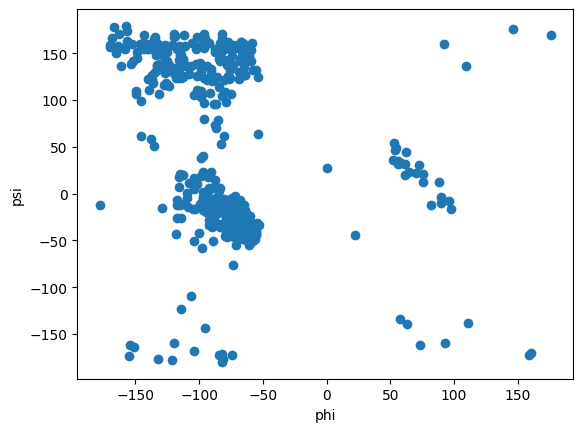

In [106]:
import matplotlib
# this inline command gets plots to appear within the notebook
# %matplotlib inline (Uncomment this)
import matplotlib.pyplot as plt

#making an empty list
phi_list = []
psi_list = []

for i in range(1, len(pose_clean.sequence())):
  #the reason why we said 1 and then len is that unlike in Python,
  #amino acids do not start wtih 0. 
  phi_list.append(pose_clean.phi(i))
  psi_list.append(pose_clean.psi(i))
  
print(phi_list)
print(psi_list)

# example of how to make a scatter plot from a list
# uncomment to see how it works and pops up in the notebook
x_coords = phi_list
y_coords = psi_list
plt.scatter(x_coords, y_coords)
plt.xlabel("phi")
plt.ylabel("psi")

# A Ramachandran plot is psi vs phi. Collect these values from the pose and plot them

### Analyzing Amino Acid Patterns

- Find all the polar amino acids in the protein. Using PyMOL, figure out where they are they located in the protein. Are there any patterns here?

Hint, don't type in a residue number one-by-one. Try `select resn XXX` and replace XXX with polar residue names in PyMOL

I tested with arginine which is a polar amino acid. Most of the polar amino acids are located on the outer surface of the protein which makes sense since the protein is assumed to be in an aqueous environment and you want hydrophilic side chains to be outside. 

### Active Site Residues

- Find all residues that coordinate with the Zn2+ atoms around TPO (have any side-chain atoms within < 2.3 Angstroms). These residues may have a role in catalysis.

Consider how you could loop through every atom index in a residue

- Get all residue types within 8 Angstroms of the active site. Are there any patterns in terms of residue types here?

Perhaps residues with backbone atoms within 8-9 Angstroms to the Zn atoms are within the active site

In [ ]:
for in range (1, len(pose.sequence())):
  

## Answers

### Exercise 6

In [ ]:
# three alanines
tripeptide = pose_from_sequence("AAA")

orig_phi = tripeptide.phi(2)
orig_psi = tripeptide.psi(2)
print("original phi:", orig_phi)
print("original psi:", orig_psi)

# print the xyz coordinates of the CB atom of residue 2 here BEFORE setting
print("xyz coordinates:", tripeptide.residue(2).xyz("CB"))

# set the phi and psi here
tripeptide.set_phi(2, -60)
tripeptide.set_psi(2, -43)

print("new phi:", tripeptide.phi(2))
print("new psi:", tripeptide.psi(2))

# print the xyz coordinates of the CB atom of residue 2 here AFTER setting
print("xyz coordinates:", tripeptide.residue(2).xyz("CB"))
# did changing the phi and psi angle change the xyz coordinates of the CB atom of alanine 2?


## References
This notebook includes some concepts and exercises from:

"Workshop #2: PyRosetta" in the PyRosetta workbook: https://graylab.jhu.edu/pyrosetta/downloads/documentation/pyrosetta4_online_format/PyRosetta4_Workshop2_PyRosetta.pdf

"Workshop #4.1: PyMOL_Mover" in the PyRosetta workbook: 
http://www.pyrosetta.org/pymol_mover-tutorial